### Import Libraries

In [58]:
# Basic Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Deep Learning Librarys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

warnings.filterwarnings('ignore')
%matplotlib inline

<!--  -->

### Sample Data

In [59]:
# Generate synthetic data for 3 weeks (21 data points)
np.random.seed(101)
time_series_data = np.random.rand(21)

<!--  -->

### RNN: Data Preparation

In [60]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [61]:
# Prepare Data
time_step = 5 # Using the previous 7 day's data to predict the next day
X, y = create_dataset(time_series_data, time_step)

- Overall Data

In [62]:
time_series_data

array([0.51639863, 0.57066759, 0.02847423, 0.17152166, 0.68527698,
       0.83389686, 0.30696622, 0.89361308, 0.72154386, 0.18993895,
       0.55422759, 0.35213195, 0.1818924 , 0.78560176, 0.96548322,
       0.23235366, 0.08356143, 0.60354842, 0.72899276, 0.27623883,
       0.68530633])

- Predictors Data

In [63]:
X

array([[0.51639863, 0.57066759, 0.02847423, 0.17152166, 0.68527698],
       [0.57066759, 0.02847423, 0.17152166, 0.68527698, 0.83389686],
       [0.02847423, 0.17152166, 0.68527698, 0.83389686, 0.30696622],
       [0.17152166, 0.68527698, 0.83389686, 0.30696622, 0.89361308],
       [0.68527698, 0.83389686, 0.30696622, 0.89361308, 0.72154386],
       [0.83389686, 0.30696622, 0.89361308, 0.72154386, 0.18993895],
       [0.30696622, 0.89361308, 0.72154386, 0.18993895, 0.55422759],
       [0.89361308, 0.72154386, 0.18993895, 0.55422759, 0.35213195],
       [0.72154386, 0.18993895, 0.55422759, 0.35213195, 0.1818924 ],
       [0.18993895, 0.55422759, 0.35213195, 0.1818924 , 0.78560176],
       [0.55422759, 0.35213195, 0.1818924 , 0.78560176, 0.96548322],
       [0.35213195, 0.1818924 , 0.78560176, 0.96548322, 0.23235366],
       [0.1818924 , 0.78560176, 0.96548322, 0.23235366, 0.08356143],
       [0.78560176, 0.96548322, 0.23235366, 0.08356143, 0.60354842],
       [0.96548322, 0.23235366, 0.

- Response Data

In [64]:
y

array([0.83389686, 0.30696622, 0.89361308, 0.72154386, 0.18993895,
       0.55422759, 0.35213195, 0.1818924 , 0.78560176, 0.96548322,
       0.23235366, 0.08356143, 0.60354842, 0.72899276, 0.27623883,
       0.68530633])

<!--  -->

### Data Reshaping
- Converting arrays to rows and columns structure like DataFrame  

In [65]:
# Reshape input to be [samples, time steps, features] which is required for RNN
X = X.reshape(X.shape[0], X.shape[1], 1)

In [66]:
X

array([[[0.51639863],
        [0.57066759],
        [0.02847423],
        [0.17152166],
        [0.68527698]],

       [[0.57066759],
        [0.02847423],
        [0.17152166],
        [0.68527698],
        [0.83389686]],

       [[0.02847423],
        [0.17152166],
        [0.68527698],
        [0.83389686],
        [0.30696622]],

       [[0.17152166],
        [0.68527698],
        [0.83389686],
        [0.30696622],
        [0.89361308]],

       [[0.68527698],
        [0.83389686],
        [0.30696622],
        [0.89361308],
        [0.72154386]],

       [[0.83389686],
        [0.30696622],
        [0.89361308],
        [0.72154386],
        [0.18993895]],

       [[0.30696622],
        [0.89361308],
        [0.72154386],
        [0.18993895],
        [0.55422759]],

       [[0.89361308],
        [0.72154386],
        [0.18993895],
        [0.55422759],
        [0.35213195]],

       [[0.72154386],
        [0.18993895],
        [0.55422759],
        [0.35213195],
        [0.18189

In [67]:
# 0.51639863 0.57066759 . . 0.89361308
# 0.57066759 0.02847423 . . 0.72154386
# .
# .
# 0.78560176 0.96548322 . . 0.68530633

<!--  -->

### `RNN Model Construction[Optimizer: SGD]`

In [44]:
# Build the RNN Model
model = Sequential()
# SimpleRNN Layer: The RNN layer has 20 units and uses the ReLU activation function. The input shape is specified as (time_step, 1).
model.add(SimpleRNN(20, activation="relu", input_shape=(time_step, 1)))
# Dense Layer: A fully connected Dense layer with 1 unit is added, which outputs the prediction.
model.add(Dense(1))
# Compilation: The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss function.
model.compile(optimizer="SGD", loss="mse")

<!--  -->

### Model Training

In [48]:
# Train Model
model.fit(X, y, epochs=100, verbose=1) # Training: The model is trained on the prepared data for 50 epochs. The verbose=1 option means progress will be printed during training.

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0772
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0768
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0765
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0762
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0759
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0756
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0753
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0750
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0747
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0744
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0741
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0739
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0736
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0733
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0731
Epoch 16/100
1/1 ━━

<!--  -->

### Make Predictions

In [49]:
# Make Forecast predictions
predictions = model.predict(X) # Predictions: The model makes predictions based on the input sequences in X.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<!--  -->

### Actuals vs Predictions
- To see how well model has been trained on Train Data
- It demonstrates training, making predictions, and comparing predicted values with actual data.

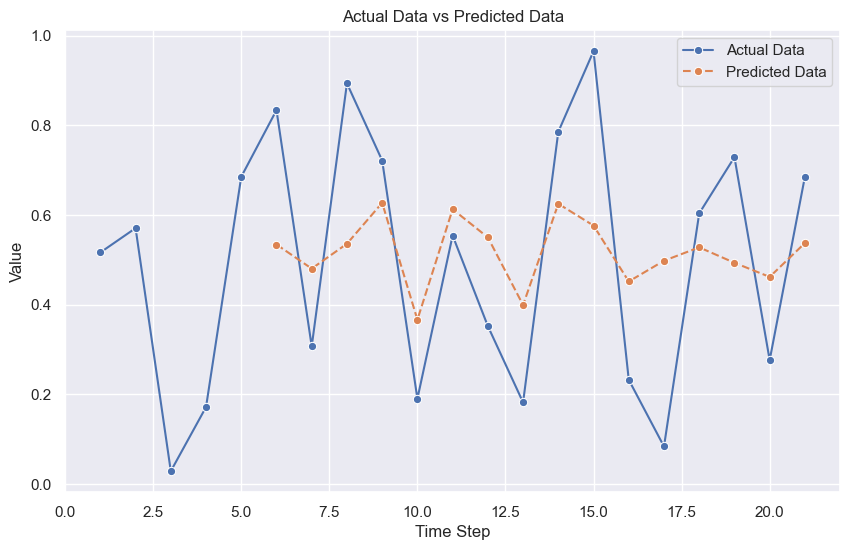

In [50]:
# Initialize the plot
sns.set(style="darkgrid")

# Plot actual data vs predictions using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(time_series_data) + 1), y=time_series_data, label='Actual Data', marker="o")
sns.lineplot(x=range(time_step + 1, len(predictions) + time_step + 1), y=predictions.flatten(), label='Predicted Data', linestyle='--', marker="o")

# Set plot labels and title
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('Actual Data vs Predicted Data')
plt.legend()
plt.show()

<!--  -->

### Last Actual and Predicted Next Value
- It predicts the next value in the sequence after the last known data point.

In [51]:
# Print the last actual value and the predicted next value
print(f"Last actual value: {time_series_data[-1]}")
next_value = model.predict(np.array([time_series_data[-time_step:]]).reshape((1, time_step, 1)))
print(f"Predicted next value: {next_value[0][0]}")

Last actual value: 0.6853063287801783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted next value: 0.6010834574699402


Observation

- RNN Sequential Model has understand last sequence and predicted almost near to the last actual value, which is good.

<!--  -->

<!--  -->

### `RNN Model Construction[Optimizer: SGD + Momentum]`

In [69]:
# Build the RNN Model
model = Sequential()
# SimpleRNN Layer: The RNN layer has 20 units and uses the ReLU activation function. The input shape is specified as (time_step, 1).
model.add(SimpleRNN(20, activation="relu", input_shape=(time_step, 1)))
# Dense Layer: A fully connected Dense layer with 1 unit is added, which outputs the prediction.
model.add(Dense(1))
# Compilation: The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss function.
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss="mse")

<!--  -->

### Model Training

In [70]:
# Train Model
model.fit(X, y, epochs=100, verbose=1) # Training: The model is trained on the prepared data for 50 epochs. The verbose=1 option means progress will be printed during training.

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - loss: 0.5466
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4283
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3085
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2062
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1386
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1065
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0960
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0979
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1063
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1163
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1239
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1268
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1246
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1186
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1104
Epoch 16/100
1/1 

<!--  -->

### Make Predictions

In [71]:
# Make Forecast predictions
predictions = model.predict(X) # Predictions: The model makes predictions based on the input sequences in X.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


<!--  -->

### Actuals vs Predictions
- To see how well model has been trained on Train Data
- It demonstrates training, making predictions, and comparing predicted values with actual data.

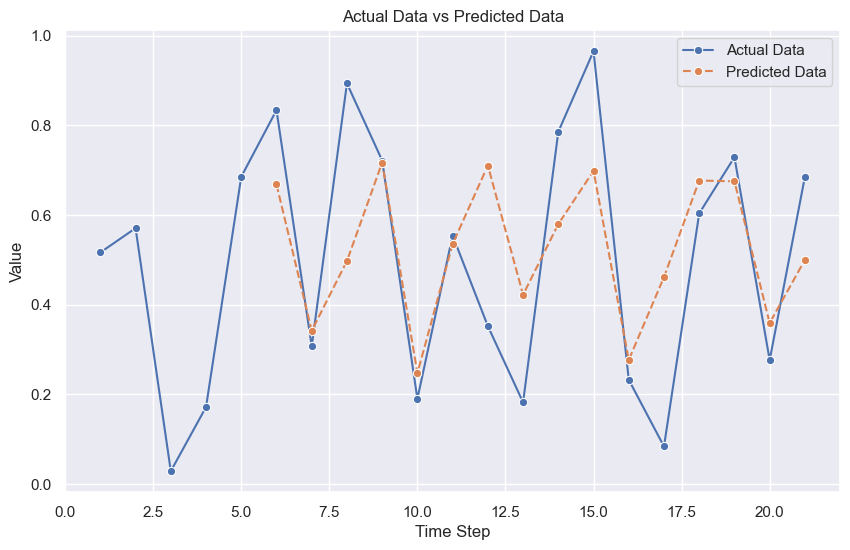

In [72]:
# Initialize the plot
sns.set(style="darkgrid")

# Plot actual data vs predictions using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(time_series_data) + 1), y=time_series_data, label='Actual Data', marker="o")
sns.lineplot(x=range(time_step + 1, len(predictions) + time_step + 1), y=predictions.flatten(), label='Predicted Data', linestyle='--', marker="o")

# Set plot labels and title
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('Actual Data vs Predicted Data')
plt.legend()
plt.show()

<!--  -->

### Last Actual and Predicted Next Value
- It predicts the next value in the sequence after the last known data point.

In [73]:
# Print the last actual value and the predicted next value
print(f"Last actual value: {time_series_data[-1]}")
next_value = model.predict(np.array([time_series_data[-time_step:]]).reshape((1, time_step, 1)))
print(f"Predicted next value: {next_value[0][0]}")

Last actual value: 0.6853063287801783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted next value: 0.7071305513381958


Observation

- With SGD + Momentum optimizer, the RNN Sequential Model has made weights updation jump smartly by including with velocity jumps during updation, which makes it more reasonable, which helps to train Well. i.e., to understand last sequence and predict almost near to the last actual value, which is better than SGD based model training.

<!--  -->

<!--  -->

### `RNN Model Construction[Optimizer: ADAM]`

In [52]:
# Build the RNN Model
model = Sequential()
# SimpleRNN Layer: The RNN layer has 20 units and uses the ReLU activation function. The input shape is specified as (time_step, 1).
model.add(SimpleRNN(20, activation="relu", input_shape=(time_step, 1)))
# Dense Layer: A fully connected Dense layer with 1 unit is added, which outputs the prediction.
model.add(Dense(1))
# Compilation: The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss function.
model.compile(optimizer="ADAM", loss="mse")

<!--  -->

### Model Training

In [53]:
# Train Model
model.fit(X, y, epochs=100, verbose=1) # Training: The model is trained on the prepared data for 50 epochs. The verbose=1 option means progress will be printed during training.

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2633
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2460
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2298
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2146
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1999
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1857
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1726
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1605
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1498
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1408
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1333
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1267
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1211
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1166
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1129
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

<!--  -->

### Make Predictions

In [54]:
# Make Forecast predictions
predictions = model.predict(X) # Predictions: The model makes predictions based on the input sequences in X.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


<!--  -->

### Actuals vs Predictions
- To see how well model has been trained on Train Data
- It demonstrates training, making predictions, and comparing predicted values with actual data.

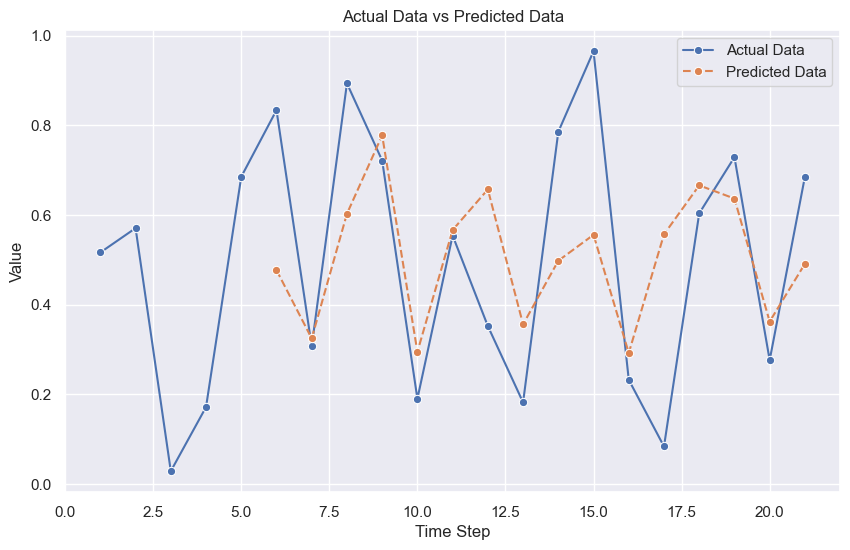

In [55]:
# Initialize the plot
sns.set(style="darkgrid")

# Plot actual data vs predictions using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(time_series_data) + 1), y=time_series_data, label='Actual Data', marker="o")
sns.lineplot(x=range(time_step + 1, len(predictions) + time_step + 1), y=predictions.flatten(), label='Predicted Data', linestyle='--', marker="o")

# Set plot labels and title
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('Actual Data vs Predicted Data')
plt.legend()
plt.show()

<!--  -->

### Last Actual and Predicted Next Value
- It predicts the next value in the sequence after the last known data point.

In [56]:
# Print the last actual value and the predicted next value
print(f"Last actual value: {time_series_data[-1]}")
next_value = model.predict(np.array([time_series_data[-time_step:]]).reshape((1, time_step, 1)))
print(f"Predicted next value: {next_value[0][0]}")

Last actual value: 0.6853063287801783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted next value: 0.6870341897010803


Observation

- With ADAM = Momentum + RMSPROP optimizer, the RNN Sequential Model has made weights updation jump smartly based on previous gradients mean and variance, which makes it more reasonable and helps to train well. i.e., to understand last sequence and predict almost near to the last actual value, which is better than SGD based model training.